In [ ]:
# Overall Stats:
# All Variables: 87.27%
# average cyclomatic complexity: 82.72%
# average number of external blocks: 86.22%
# proprietary code count: 82.38%
# average number of inline blocks: 80.33%
# number of DOM on-event handlers: 86.31%

In [2]:
# The below was heavily inspired by
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

import pandas as pd # Needed for iloc.
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Reading the data from the provided csv. 
rawdata = pd.read_csv(r"C:\Users\jft2456\Desktop\PrePracticum\wc.csv")

# Changing the rawdata type so that we receive true/false values in the reshaped array. 
# False values are known phishing URLs.  True values are known good values from Alexa Internet Rankings. 
rawdata.type = (rawdata.type == "alexa")

In [4]:
rawdata.head()

,site,scrap_time,path,has_html,inline_count,avg_inline_script_block,external_count,avg_external_script_block,onclick_count,onload_count,onchange_count,avg_onclick_count,avg_onload_count,avg_onchange_count,avg_cyc_complexity,library_code_count,type
0,0.2090000.ru,2017-11-17 11-19-03,C:\Phishing Project\phishtank - november 2017\...,True,2.0,0.0,4.0,64.000000,1,1.0,0.0,358,3,1,0.000000,0,False
1,000keca.wcomhost.com,2017-09-20 07-53-06,C:\Phishing Project\phishtank - september 2017...,True,2.0,2.0,2.0,169.000000,1,1.0,0.0,219,1,1,1.000000,1,False
2,000pichincha.webcindario.com,2017-11-21 03-59-08,C:\Phishing Project\phishtank - november 2017\...,True,4.0,0.0,3.0,260.500000,1,0.0,1.0,1783,1,2,1.000000,2,False
3,003.ru,2017-12-03 02-44-02,C:\target site - 20K alexa\content\15c\003.ru\...,True,75.0,0.0,18.5,955.733333,2,72.0,0.0,41327,4,15,0.733333,11,True
4,007ex.com,2017-12-04 06-09-04,C:\target site - 20K alexa\content\d10\007ex.c...,True,3.0,0.0,6.0,740.600000,1,0.0,0.0,10901,1,5,0.800000,4,True


In [5]:
# Selecting the desired rows (excluding site, scrape_time, and path).
X = rawdata.iloc[:,4:16].values  # Dependent variables. 
y = rawdata.iloc[:,16].values    # Response variable (aleax, or not phish, and phish). 

# Reshaping into a flat array to allow processing.
y.reshape((24232,))

array([False, False, False, ...,  True,  True,  True])

In [6]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.27%


In [ ]:
# NOTE: The colums in the wc.csv file were moved to allow values in the same feature category to be considered together. 
# No content was changed. 

In [7]:
# Repeating the process for the most important feature according to table V, average cyclomatic complexity. 


# Selecting the desired row (only avg_cyc_complexity).
X = rawdata.iloc[:,14:15].values
y = rawdata.iloc[:,16].values

# Reshaping into a flat array to allow processing.
y.reshape((24232,))

array([False, False, False, ...,  True,  True,  True])

In [8]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.72%


In [9]:
# Repeating the process for the third most important feature according to table V, average number of external blocks. 


# Selecting the desired rows (only external_count and avg_external_script_block).
X = rawdata.iloc[:,6:8].values
y = rawdata.iloc[:,16].values

# Reshaping into a flat array to allow processing.
y.reshape((24232,))

array([False, False, False, ...,  True,  True,  True])

In [10]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.22%


In [11]:
# Repeating the process for the seventh most important feature according to table V, proprietary code count. 


# Selecting the desired row (only library_code_count).
X = rawdata.iloc[:,15:16].values
y = rawdata.iloc[:,16].values

# Reshaping into a flat array to allow processing.
y.reshape((24232,))

array([False, False, False, ...,  True,  True,  True])

In [12]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.38%


In [13]:
# Repeating the process for the ninth most important feature according to table V, average number of inline blocks. 


# Selecting the desired rows (only inline_count and avg_inline_script_block).
X = rawdata.iloc[:,4:6].values
y = rawdata.iloc[:,16].values

# Reshaping into a flat array to allow processing.
y.reshape((24232,))

array([False, False, False, ...,  True,  True,  True])

In [14]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.33%


In [15]:
# Repeating the process for a feature not listed on table V, number of DOM on-event handlers. 


# Selecting the desired rows (only inline_count and avg_inline_script_block).
X = rawdata.iloc[:,8:14].values
y = rawdata.iloc[:,16].values

# Reshaping into a flat array to allow processing.
y.reshape((24232,))

array([False, False, False, ...,  True,  True,  True])

In [16]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.31%


In [17]:
# Function for producing logarithmic scales of inputted phishing data. 
def figure_1(y,X):
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # Creating lists to store values for boxplots
    alexa_values = []
    phish_values = []
    for i in range(len(y)):
        if y[i] == True:
            alexa_values.append(float(X[i]))
        else:
            phish_values.append(float(X[i]))

    # Inputting extremely small value to substitute for 0 so that we can use log
    for j in alexa_values:
        if j == 0:
            j += 10**-10
    
    for k in phish_values:
        if k == 0:
            k += 10**-10
    
    # Creating boxplots for both alexa and phish values.  
    # I'm using the log of each list to replicate paper (i.e., y axis of Count (Logarithmic Scale))
    fig = plt.figure(figsize=(18, 6))

    ax = plt.subplot(1, 3, 1)
    ax.boxplot(np.log(alexa_values))
    ax.set_title('Alexa')

    ax = plt.subplot(1, 3, 2)
    ax.boxplot(np.log(phish_values))
    ax.set_title('Phish')

    plt.show()

In [18]:
# Inline Blocks (inline_count)

X = rawdata.iloc[:,4:5].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


<Figure size 1800x600 with 2 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encount

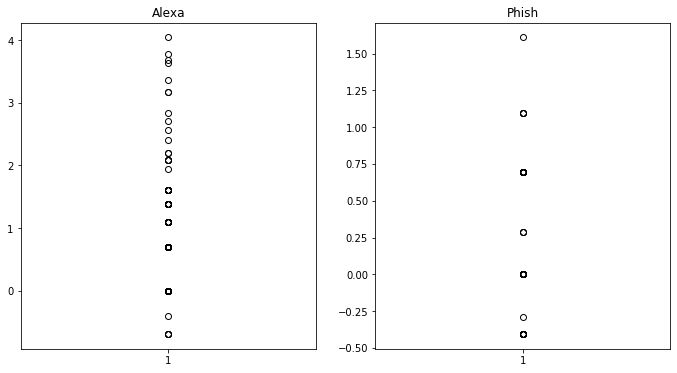

In [39]:
# Inline Blocks (avg_inline_script_block - This one doesn't work well)

X = rawdata.iloc[:,5:6].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


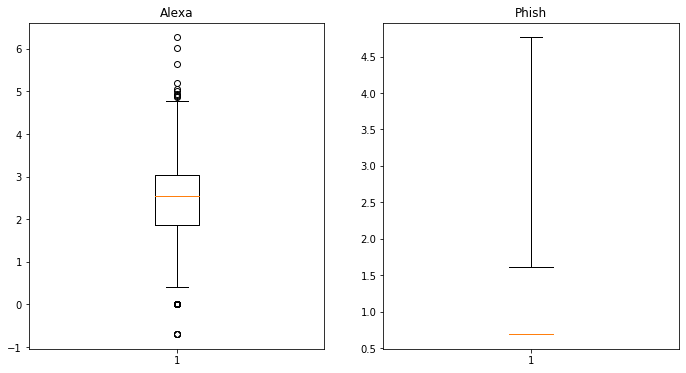

In [37]:
# External Blocks (external_count)

X = rawdata.iloc[:,6:7].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


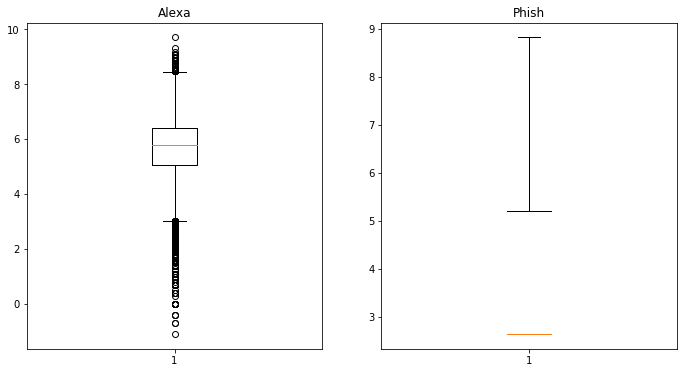

In [38]:
# External Blocks (avg_external_script_block)

X = rawdata.iloc[:,7:8].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


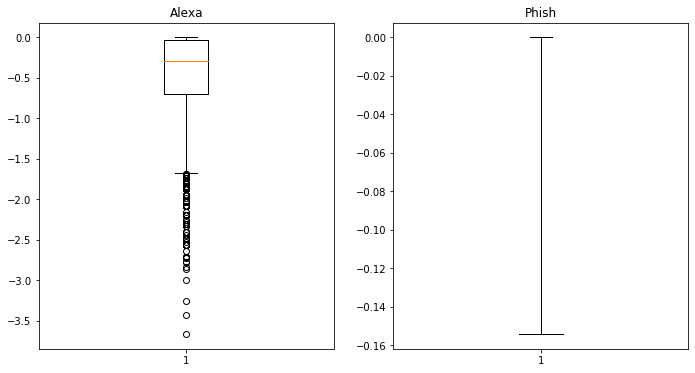

In [40]:
# Cyclomatic Complexity (avg_cyc_complexity)

X = rawdata.iloc[:,14:15].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


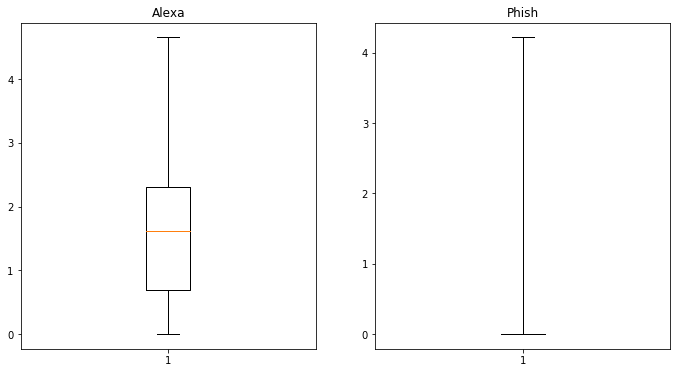

In [41]:
# LOC for library files (library_code_count)

X = rawdata.iloc[:,15:16].values
y = rawdata.iloc[:,16].values

figure_1(y,X)